In [56]:
import numpy as np
import matplotlib.pyplot as plot
import sklearn.datasets as skd
import sklearn.linear_model as skm

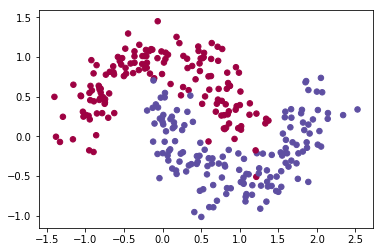

In [57]:
np.random.seed(0)
moonX, moonY = skd.make_moons(300, noise=0.20)
plot.scatter(moonX[:,0], moonX[:,1], s=30, c=moonY, cmap=plot.cm.Spectral)
plot.show()

In [66]:
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = moonX[:, 0].min() - .5, moonX[:, 0].max() + .5
    y_min, y_max = moonX[:, 1].min() - .5, moonX[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plot.contourf(xx, yy, Z, cmap=plot.cm.Spectral)
    plot.scatter(moonX[:, 0], moonX[:, 1], c=moonY, cmap=plot.cm.Spectral)

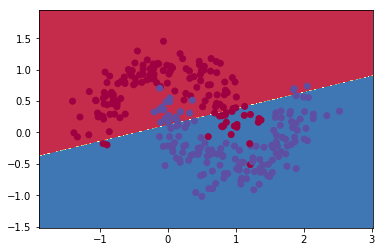

In [69]:
classifier = skm.LogisticRegressionCV()
classifier.fit(moonX, moonY)

plot_decision_boundary(lambda f: classifier.predict(f))
plot.show()

In [83]:
import numpy as np

def nonlin(x,deriv=False):
    if(deriv==True):
        return x*(1-x)

    return 1/(1+np.exp(-x))
    
X = np.array([[0,0,1],
            [0,1,1],
            [1,0,1],
            [1,1,1]])
                
y = np.array([[0],
            [1],
            [1],
            [0]])

np.random.seed(1)

# randomly initialize our weights with mean 0
syn0 = 2*np.random.random((3,4)) - 1
syn1 = 2*np.random.random((4,1)) - 1

for j in range(60000):

    # Feed forward through layers 0, 1, and 2
    l0 = X
    l1 = nonlin(np.dot(l0,syn0))
    l2 = nonlin(np.dot(l1,syn1))

    # how much did we miss the target value?
    l2_error = y - l2
    
    if (j% 10000) == 0:
        print ("Error:" + str(np.mean(np.abs(l2_error))))
        
    # in what direction is the target value?
    # were we really sure? if so, don't change too much.
    l2_delta = l2_error*nonlin(l2,deriv=True)

    # how much did each l1 value contribute to the l2 error (according to the weights)?
    l1_error = l2_delta.dot(syn1.T)
    
    # in what direction is the target l1?
    # were we really sure? if so, don't change too much.
    l1_delta = l1_error * nonlin(l1,deriv=True)

    syn1 += l1.T.dot(l2_delta)
    syn0 += l0.T.dot(l1_delta)



Error:0.496410031903
Error:0.00858452565325
Error:0.00578945986251
Error:0.00462917677677
Error:0.00395876528027
Error:0.00351012256786


ValueError: shapes (4,3) and (1,4) not aligned: 3 (dim 1) != 1 (dim 0)